<a href="https://colab.research.google.com/github/varshum12/30_july_ML_WEEKDAYS/blob/main/binary_classification_10_august_weekend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as  pd
import numpy as np
import seaborn as  sns
import matplotlib.pyplot as plt
from warnings  import filterwarnings
filterwarnings('ignore')

In [2]:
path  = '/content/e_commerce.csv'

In [3]:
df  =  pd.read_csv(path)

# basic  checks and qualitu  checks

In [4]:
df.head()

,account length,location code,user id,credit card info save,push status,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,churn
0,128,415,3824657,no,yes,25,265,45,17,110.0,197,87,244.7,91,11.01,10.0,3,2.70,1.0,0
1,107,415,3717191,no,yes,26,162,27,17,123.0,196,103,254.4,103,11.45,13.7,3,3.70,1.0,0
2,137,415,3581921,no,no,0,243,41,10,114.0,121,110,162.6,104,7.32,12.2,5,3.29,0.0,0
3,84,408,3759999,yes,no,0,299,51,5,71.0,62,88,196.9,89,8.86,6.6,7,1.78,2.0,0
4,75,415,3306626,yes,no,0,167,28,13,113.0,148,122,186.9,121,8.41,10.1,3,2.73,3.0,0


In [5]:
df.shape

(3333, 20)

In [6]:
df.columns

Index(['account length', 'location code', 'user id', 'credit card info save',
       'push status', 'add to wishlist', 'desktop sessions', 'app sessions',
       'desktop transactions', 'total product detail views',
       'session duration', 'promotion clicks', 'avg order value',
       'sale product views', 'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls', 'churn'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   account length                       3333 non-null   int64  
 1   location code                        3333 non-null   int64  
 2   user id                              3333 non-null   int64  
 3   credit card info save                3333 non-null   object 
 4   push status                          3333 non-null   object 
 5   add to wishlist                      3333 non-null   int64  
 6   desktop sessions                     3333 non-null   int64  
 7   app sessions                         3333 non-null   int64  
 8   desktop transactions                 3333 non-null   int64  
 9   total product detail views           3281 non-null   float64
 10  session duration                     3333 non-null   int64  
 11  promotion clicks              

In [8]:
df.isnull().sum()

,0
account length,0
location code,0
user id,0
credit card info save,0
push status,0
add to wishlist,0
desktop sessions,0
app sessions,0
desktop transactions,0
total product detail views,52


In [9]:
# duplicates
df.duplicated().sum()

np.int64(0)

# seperate x  & y

In [10]:
x  = df.drop('churn' ,  axis  =  1)
y  =  df['churn']

# seperate  cat and  numeric data

In [11]:
cat  =  x.columns[x.dtypes == 'object']
num  =  x.columns[x.dtypes != 'object']

# create  pipeline

In [12]:
from  sklearn.pipeline import  Pipeline
from  sklearn.preprocessing import  StandardScaler , OrdinalEncoder
from  sklearn.compose  import ColumnTransformer
from sklearn.impute  import SimpleImputer

In [13]:
num_pipeline  = Pipeline(steps  =  [ ('imputer'  ,  SimpleImputer(strategy= 'mean')) ,  ('scaler' ,  StandardScaler()) ])
cat_pipeline  =  Pipeline(steps  = [('imputer' ,  SimpleImputer(strategy= 'most_frequent')) ,
                                    ('encoder' ,  OrdinalEncoder())])

In [14]:
pre  =   ColumnTransformer([('num' ,  num_pipeline ,  num) ,
                            ('cat' , cat_pipeline   , cat)])

In [15]:
pre

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', StandardScaler())]),
                                 Index(['account length', 'location code', 'user id', 'add to wishlist',
       'desktop sessions', 'app sessions', 'desktop transactions',
       'total product detail views', 'session duration', 'promotion clicks',
       'avg order value', 'sale product views',
       'discount rate per visited products',
       'product detail view per app session', 'app transactions',
       'add to cart per session', 'customer service calls'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OrdinalEncoder())]),
                                 Index(['credit card info save', 'push status'], dtype='object'))])

In [30]:
# transform data
x_scaled   =  pre.fit_transform(x)

In [31]:
cols  =  []
for i  in pre.get_feature_names_out() :
  cols.append(i.split('__')[1])
cols

['account length',
 'location code',
 'user id',
 'add to wishlist',
 'desktop sessions',
 'app sessions',
 'desktop transactions',
 'total product detail views',
 'session duration',
 'promotion clicks',
 'avg order value',
 'sale product views',
 'discount rate per visited products',
 'product detail view per app session',
 'app transactions',
 'add to cart per session',
 'customer service calls',
 'credit card info save',
 'push status']

In [32]:
x_scaled  =  pd.DataFrame(x_scaled ,  columns  =  cols )

In [33]:
x_scaled

,account length,location code,user id,add to wishlist,desktop sessions,app sessions,desktop transactions,total product detail views,session duration,promotion clicks,avg order value,sale product views,discount rate per visited products,product detail view per app session,app transactions,add to cart per session,customer service calls,credit card info save,push status
0,0.676489,-0.523603,0.285359,1.234883,1.564550,1.557193,-0.020265,4.750568e-01,-0.079666,-0.658138,0.866743,-0.465494,0.866029,-0.088063,-0.601195,-0.085690,-0.430100,0.0,1.0
1,0.149065,-0.523603,-0.105965,1.307948,-0.327130,-0.384977,-0.020265,1.129111e+00,-0.099387,0.145038,1.058571,0.147825,1.059390,1.249269,-0.601195,1.241169,-0.430100,0.0,1.0
2,0.902529,-0.523603,-0.598534,-0.591760,1.160502,1.125600,-1.639456,6.763043e-01,-1.578480,0.496427,-0.756869,0.198935,-0.755571,0.707108,0.211534,0.697156,-1.196647,0.0,0.0
3,-0.428590,-0.688834,0.049915,-0.591760,2.188988,2.204583,-2.796021,-1.487106e+00,-2.742033,-0.607939,-0.078551,-0.567714,-0.078806,-1.316962,1.024263,-1.306401,0.336447,1.0,0.0
4,-0.654629,-0.523603,-1.600987,-0.591760,-0.235301,-0.277078,-0.945517,6.259924e-01,-1.046007,1.098809,-0.276311,1.067803,-0.276562,-0.051918,-0.601195,-0.045885,1.102994,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,2.283878,-0.523603,1.449212,2.038605,-0.437325,-0.384977,0.211048,-1.185235e+00,0.295038,1.299603,1.547039,-0.874374,1.547188,-0.124207,0.617898,-0.125496,0.336447,0.0,1.0
3329,-0.830437,-0.523603,-0.156653,-0.591760,0.940112,0.909803,-0.945517,7.149746e-16,-0.947401,-2.264489,-0.189297,1.170023,-0.188670,-0.232639,-0.194831,-0.231645,1.102994,0.0,0.0
3330,-1.835055,1.718817,-1.667974,-0.591760,0.021821,0.046617,1.830239,4.247450e-01,1.734688,-2.113894,-0.177431,-0.465494,-0.175486,1.393846,0.617898,1.387123,0.336447,0.0,0.0
3331,2.082955,1.718817,-0.363811,-0.591760,0.627893,0.586108,-0.714204,2.234975e-01,-0.809352,-0.808733,-1.219628,1.885562,-1.221396,-1.895268,2.243356,-1.876950,0.336447,1.0,0.0


# split train test

In [34]:
from sklearn.model_selection import  train_test_split

In [35]:
x_train  , x_test  , y_train  ,  y_test  =  train_test_split(x_scaled ,  y  ,
                                                             random_state  =  4 ,
                                                             test_size  =  0.2)

In [36]:
print(x_train.shape  ,  y_train.shape)
print(x_test.shape , y_test.shape)

(2666, 19) (2666,)
(667, 19) (667,)


In [40]:
from  keras.models  import  Sequential
from  keras.layers  import  Input  ,Dense  , Dropout

In [49]:
nn  = Sequential()
## add input  layer
nn.add(Dense(units=  x_train.shape[1] ,  kernel_initializer =
             'he_uniform' ,  activation  = 'relu' ))


 ## hidden layer
nn.add(Dense(100 ,  kernel_initializer =    'he_uniform'  ,   activation  = 'relu'  ))
nn.add(Dropout(0.2))



nn.add(Dense(200 ,  kernel_initializer =    'he_uniform'  ,   activation  = 'relu'  ))
nn.add(Dropout(0.3))


## output  layer
nn.add(Dense(1  ,  kernel_initializer= 'glorot_uniform' ,  activation = 'sigmoid'))



In [50]:
#  compile
nn.compile(optimizer= 'adam' ,  loss  = 'binary_crossentropy'  ,
           metrics  = ['accuracy' ] )

#  model  fitting

In [51]:
hist = nn.fit(x_train  ,  y_train  ,
       validation_split= 0.15  ,
       batch_size  =  128  ,
       verbose= 1  , epochs  = 50   )

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 191ms/step - accuracy: 0.7320 - loss: 0.6837 - val_accuracy: 0.8300 - val_loss: 0.4127
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8188 - loss: 0.4935 - val_accuracy: 0.8325 - val_loss: 0.4047
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8374 - loss: 0.4563 - val_accuracy: 0.8475 - val_loss: 0.3711
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8517 - loss: 0.4223 - val_accuracy: 0.8400 - val_loss: 0.3603
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8519 - loss: 0.4031 - val_accuracy: 0.8450 - val_loss: 0.3609
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8532 - loss: 0.3992 - val_accuracy: 0.8550 - val_loss: 0.3480
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8610 - loss: 0.3694 - val_accuracy: 0.8500 - val_loss: 0.3445
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8612 - loss: 0.3761 - val_accuracy: 0.8575 - val_los

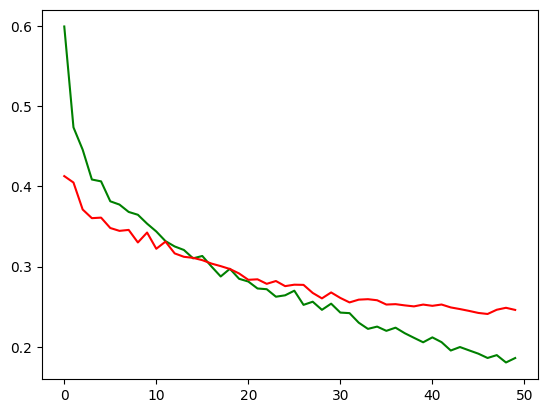

In [52]:
# plot  graphs
plt.plot(hist.history['loss'] , c =  'green')
plt.plot(hist.history['val_loss'] , c =  'red')

# evaluate  model


In [53]:
from  sklearn.metrics  import (confusion_matrix,
accuracy_score ,
f1_score ,
classification_report)

In [56]:
pred  =   nn.predict(x_train)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [57]:
pred

array([[0.04994667],
       [0.00853892],
       [0.88983047],
       ...,
       [0.00455027],
       [0.0098486 ],
       [0.0034398 ]], dtype=float32)

In [64]:
y_pred =  nn.predict(x_train)
pred =  []
for  i in  y_pred:
  if  i >= 0.5 :
    pred.append(1)
  else:
    pred.append(0)


84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [67]:
pred

[0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,


In [76]:
acc  =  accuracy_score( y_train ,  pred)
f1 =  f1_score(y_train  , pred)
report  =  classification_report(y_train  , pred)
matrix  =  confusion_matrix(y_train  , pred)
print(f"acc   -- >  {acc}" )
print(f"f1   -- >  {f1}" )
print(f"{report}" )
print(f"  confunction matrix   -- >  {matrix}" )

acc   -- >  0.9429857464366092
f1   -- >  0.7847025495750708
              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2272
           1       0.89      0.70      0.78       394

    accuracy                           0.94      2666
   macro avg       0.92      0.84      0.88      2666
weighted avg       0.94      0.94      0.94      2666

  confunction matrix   -- >  [[2237   35]
 [ 117  277]]


acc   -- >  0.9429857464366092
f1   -- >  0.7847025495750708
classification  report   -- >                precision    recall  f1-score   support

           0       0.95      0.98      0.97      2272
           1       0.89      0.70      0.78       394

    accuracy                           0.94      2666
   macro avg       0.92      0.84      0.88      2666
weighted avg       0.94      0.94      0.94      2666

  confunction matrix   -- >  [[2237   35]
 [ 117  277]]
